In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LayerNormalization
from keras.regularizers import l2
from keras.regularizers import l1
from keras.regularizers import l1_l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from tensorflow.keras import initializers

# Part 1: Exploring the data set

In [2]:
dframe = pd.read_fwf("housing.data",names=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","MEDV"])

In [3]:
dframe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
dframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,1.716290,2.653510,0.00632,0.0819,0.250895,2.326718,9.96654
zn,506.0,11.363636,23.322453,0.00000,0.0000,0.000000,12.500000,100.00000
indus,506.0,11.136779,6.860353,0.46000,5.1900,9.690000,18.100000,27.74000
chas,506.0,0.069170,0.253994,0.00000,0.0000,0.000000,0.000000,1.00000
nox,506.0,0.554695,0.115878,0.38500,0.4490,0.538000,0.624000,0.87100
rm,506.0,6.284634,0.702617,3.56100,5.8855,6.208500,6.623500,8.78000
age,506.0,68.574901,28.148861,2.90000,45.0250,77.500000,94.075000,100.00000
dis,506.0,3.696228,1.999689,0.58570,2.0737,3.107300,5.112625,9.22290
rad,506.0,4.332016,1.417166,1.00000,4.0000,4.000000,5.000000,8.00000
tax,506.0,408.237154,168.537116,187.00000,279.0000,330.000000,666.000000,711.00000


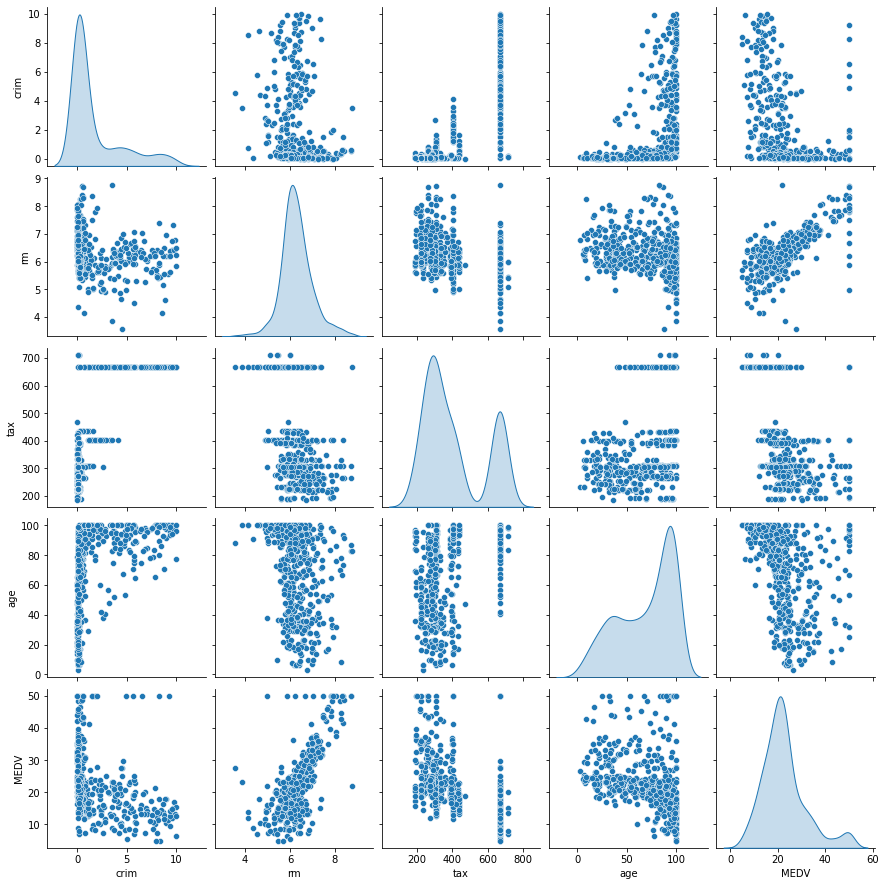

In [5]:
sb.pairplot(dframe[['crim', 'rm', 'tax', 'age','MEDV']], diag_kind='kde')

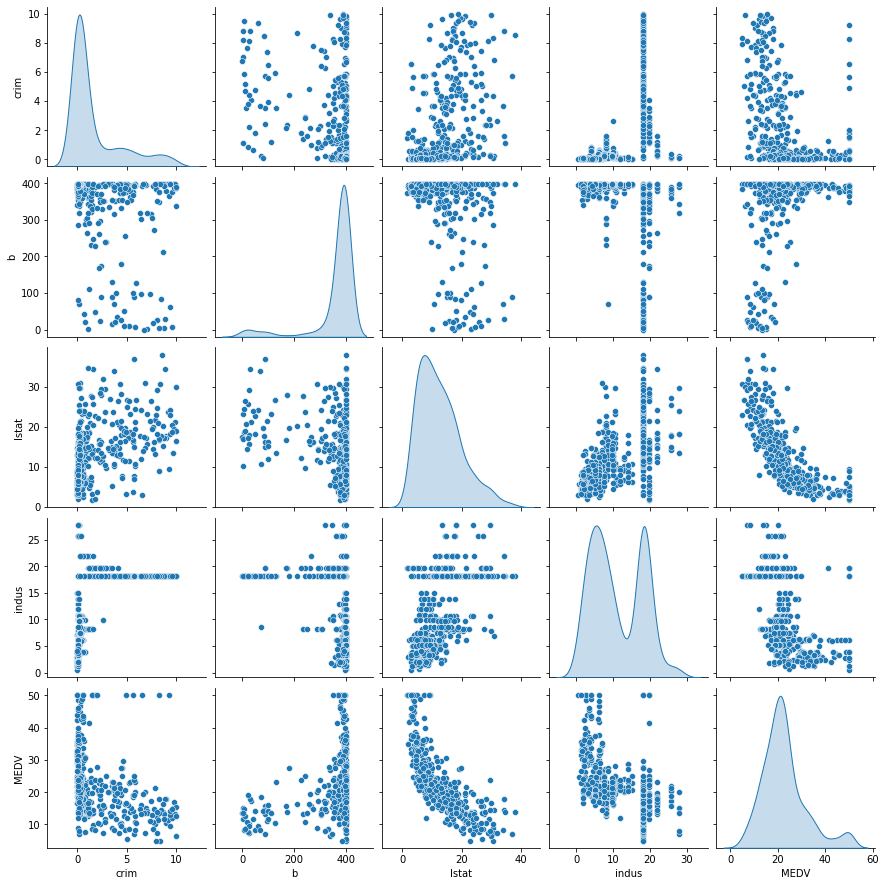

In [6]:
sb.pairplot(dframe[['crim', 'b', 'lstat', 'indus','MEDV']], diag_kind='kde')

## Part 2: testing one of the candidate models on a subset of data

In [7]:
dframe_less = dframe.drop(["nox","chas","rad","rm","zn"],axis=1)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(dframe_less.drop(["MEDV"],axis=1), dframe.MEDV, test_size=0.2)

In [11]:
model4 = Sequential()
dropout_rate=0.2
model4.add(Dense(128, kernel_initializer="lecun_uniform", input_dim=xtrain.shape[1], activation="relu"))
model4.add(Dropout(dropout_rate))
model4.add(Dense(256, kernel_initializer="lecun_uniform", activation="relu"))
model4.add(Dropout(dropout_rate))
model4.add(Dense(256, kernel_initializer="lecun_uniform", activation="relu"))
model4.add(Dropout(dropout_rate))
model4.add(Dense(256, kernel_initializer="lecun_uniform", activation="relu"))
model4.add(Dense(1, kernel_initializer="lecun_uniform", activation='linear'))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=["mean_absolute_percentage_error"])

In [12]:
model4.fit(xtrain, ytrain, epochs=1500, validation_split=0.2, batch_size=32,verbose=1)

Epoch 1/1500
11/11 [==============================] - 1s 43ms/step - loss: 4471.2751 - mean_absolute_percentage_error: 272.5625 - val_loss: 538.2887 - val_mean_absolute_percentage_error: 126.9598
Epoch 2/1500
11/11 [==============================] - 0s 12ms/step - loss: 678.5494 - mean_absolute_percentage_error: 113.8392 - val_loss: 166.8216 - val_mean_absolute_percentage_error: 41.0297
Epoch 3/1500
11/11 [==============================] - 0s 13ms/step - loss: 331.7071 - mean_absolute_percentage_error: 76.3527 - val_loss: 200.0988 - val_mean_absolute_percentage_error: 46.8593
Epoch 4/1500
11/11 [==============================] - 0s 12ms/step - loss: 250.9757 - mean_absolute_percentage_error: 55.9604 - val_loss: 139.9763 - val_mean_absolute_percentage_error: 33.5777
Epoch 5/1500
11/11 [==============================] - 0s 13ms/step - loss: 210.1026 - mean_absolute_percentage_error: 61.1484 - val_loss: 160.6927 - val_mean_absolute_percentage_error: 38.2210
Epoch 6/1500
11/11 [===========

11/11 [==============================] - 0s 8ms/step - loss: 103.8682 - mean_absolute_percentage_error: 43.0123 - val_loss: 249.1252 - val_mean_absolute_percentage_error: 55.4991
Epoch 44/1500
11/11 [==============================] - 0s 8ms/step - loss: 81.8450 - mean_absolute_percentage_error: 34.2267 - val_loss: 185.3426 - val_mean_absolute_percentage_error: 44.4783
Epoch 45/1500
11/11 [==============================] - 0s 8ms/step - loss: 92.1945 - mean_absolute_percentage_error: 36.0859 - val_loss: 207.7694 - val_mean_absolute_percentage_error: 48.5598
Epoch 46/1500
11/11 [==============================] - 0s 9ms/step - loss: 82.1609 - mean_absolute_percentage_error: 30.5294 - val_loss: 163.2310 - val_mean_absolute_percentage_error: 39.5126
Epoch 47/1500
11/11 [==============================] - 0s 8ms/step - loss: 82.8494 - mean_absolute_percentage_error: 36.7143 - val_loss: 132.3175 - val_mean_absolute_percentage_error: 32.8251
Epoch 48/1500
11/11 [==============================] 

11/11 [==============================] - 0s 8ms/step - loss: 67.3297 - mean_absolute_percentage_error: 29.5083 - val_loss: 132.2502 - val_mean_absolute_percentage_error: 32.6184
Epoch 86/1500
11/11 [==============================] - 0s 8ms/step - loss: 76.8600 - mean_absolute_percentage_error: 35.1361 - val_loss: 176.1559 - val_mean_absolute_percentage_error: 42.9769
Epoch 87/1500
11/11 [==============================] - 0s 8ms/step - loss: 72.2368 - mean_absolute_percentage_error: 31.9870 - val_loss: 122.2993 - val_mean_absolute_percentage_error: 32.6172
Epoch 88/1500
11/11 [==============================] - 0s 8ms/step - loss: 77.3770 - mean_absolute_percentage_error: 36.5419 - val_loss: 195.1113 - val_mean_absolute_percentage_error: 46.5802
Epoch 89/1500
11/11 [==============================] - 0s 8ms/step - loss: 83.0065 - mean_absolute_percentage_error: 31.4590 - val_loss: 136.4639 - val_mean_absolute_percentage_error: 32.8749
Epoch 90/1500
11/11 [==============================] -

11/11 [==============================] - 0s 8ms/step - loss: 75.1186 - mean_absolute_percentage_error: 35.3685 - val_loss: 187.8815 - val_mean_absolute_percentage_error: 46.3511
Epoch 128/1500
11/11 [==============================] - 0s 9ms/step - loss: 68.1857 - mean_absolute_percentage_error: 27.8658 - val_loss: 113.0410 - val_mean_absolute_percentage_error: 29.7718
Epoch 129/1500
11/11 [==============================] - 0s 8ms/step - loss: 62.7372 - mean_absolute_percentage_error: 30.4526 - val_loss: 156.7551 - val_mean_absolute_percentage_error: 39.6127
Epoch 130/1500
11/11 [==============================] - 0s 8ms/step - loss: 81.2956 - mean_absolute_percentage_error: 28.3091 - val_loss: 157.1750 - val_mean_absolute_percentage_error: 39.1022
Epoch 131/1500
11/11 [==============================] - 0s 8ms/step - loss: 70.9595 - mean_absolute_percentage_error: 28.8675 - val_loss: 138.4392 - val_mean_absolute_percentage_error: 35.2824
Epoch 132/1500
11/11 [============================

11/11 [==============================] - 0s 8ms/step - loss: 62.3944 - mean_absolute_percentage_error: 31.2133 - val_loss: 152.0988 - val_mean_absolute_percentage_error: 38.9129
Epoch 170/1500
11/11 [==============================] - 0s 8ms/step - loss: 55.0589 - mean_absolute_percentage_error: 26.8533 - val_loss: 118.8006 - val_mean_absolute_percentage_error: 31.8785
Epoch 171/1500
11/11 [==============================] - 0s 8ms/step - loss: 56.8612 - mean_absolute_percentage_error: 28.0438 - val_loss: 136.5780 - val_mean_absolute_percentage_error: 36.2728
Epoch 172/1500
11/11 [==============================] - 0s 8ms/step - loss: 58.3304 - mean_absolute_percentage_error: 26.7579 - val_loss: 166.7534 - val_mean_absolute_percentage_error: 42.5262
Epoch 173/1500
11/11 [==============================] - 0s 8ms/step - loss: 63.1931 - mean_absolute_percentage_error: 25.7043 - val_loss: 118.2287 - val_mean_absolute_percentage_error: 33.4369
Epoch 174/1500
11/11 [============================

11/11 [==============================] - 0s 9ms/step - loss: 62.8583 - mean_absolute_percentage_error: 27.4263 - val_loss: 102.6189 - val_mean_absolute_percentage_error: 30.4326
Epoch 212/1500
11/11 [==============================] - 0s 8ms/step - loss: 65.4615 - mean_absolute_percentage_error: 29.6561 - val_loss: 135.7106 - val_mean_absolute_percentage_error: 37.3993
Epoch 213/1500
11/11 [==============================] - 0s 8ms/step - loss: 50.7852 - mean_absolute_percentage_error: 25.9764 - val_loss: 123.9282 - val_mean_absolute_percentage_error: 35.3462
Epoch 214/1500
11/11 [==============================] - 0s 8ms/step - loss: 53.0329 - mean_absolute_percentage_error: 26.8228 - val_loss: 129.5480 - val_mean_absolute_percentage_error: 37.0894
Epoch 215/1500
11/11 [==============================] - 0s 8ms/step - loss: 53.4621 - mean_absolute_percentage_error: 25.2448 - val_loss: 131.2482 - val_mean_absolute_percentage_error: 36.9837
Epoch 216/1500
11/11 [============================

11/11 [==============================] - 0s 8ms/step - loss: 61.6814 - mean_absolute_percentage_error: 25.5050 - val_loss: 94.0002 - val_mean_absolute_percentage_error: 29.0362
Epoch 254/1500
11/11 [==============================] - 0s 9ms/step - loss: 46.4653 - mean_absolute_percentage_error: 26.4489 - val_loss: 137.9976 - val_mean_absolute_percentage_error: 38.7096
Epoch 255/1500
11/11 [==============================] - 0s 8ms/step - loss: 70.4227 - mean_absolute_percentage_error: 26.5137 - val_loss: 117.7164 - val_mean_absolute_percentage_error: 34.5840
Epoch 256/1500
11/11 [==============================] - 0s 8ms/step - loss: 57.3947 - mean_absolute_percentage_error: 26.0153 - val_loss: 107.5940 - val_mean_absolute_percentage_error: 32.5029
Epoch 257/1500
11/11 [==============================] - 0s 8ms/step - loss: 51.3901 - mean_absolute_percentage_error: 26.1274 - val_loss: 139.2408 - val_mean_absolute_percentage_error: 39.5171
Epoch 258/1500
11/11 [=============================

Epoch 295/1500
11/11 [==============================] - 0s 8ms/step - loss: 39.3338 - mean_absolute_percentage_error: 23.5038 - val_loss: 116.0386 - val_mean_absolute_percentage_error: 35.7814
Epoch 296/1500
11/11 [==============================] - 0s 8ms/step - loss: 40.8619 - mean_absolute_percentage_error: 22.9404 - val_loss: 93.5687 - val_mean_absolute_percentage_error: 31.0885
Epoch 297/1500
11/11 [==============================] - 0s 8ms/step - loss: 44.7249 - mean_absolute_percentage_error: 26.7607 - val_loss: 106.2364 - val_mean_absolute_percentage_error: 33.6830
Epoch 298/1500
11/11 [==============================] - 0s 8ms/step - loss: 42.3817 - mean_absolute_percentage_error: 22.1002 - val_loss: 98.8841 - val_mean_absolute_percentage_error: 32.0175
Epoch 299/1500
11/11 [==============================] - 0s 8ms/step - loss: 43.8319 - mean_absolute_percentage_error: 25.4374 - val_loss: 140.4485 - val_mean_absolute_percentage_error: 41.9082
Epoch 300/1500
11/11 [===============

11/11 [==============================] - 0s 9ms/step - loss: 37.6471 - mean_absolute_percentage_error: 23.0139 - val_loss: 84.8738 - val_mean_absolute_percentage_error: 30.5033
Epoch 338/1500
11/11 [==============================] - 0s 9ms/step - loss: 39.7568 - mean_absolute_percentage_error: 24.7344 - val_loss: 90.9175 - val_mean_absolute_percentage_error: 30.4752
Epoch 339/1500
11/11 [==============================] - 0s 8ms/step - loss: 46.2091 - mean_absolute_percentage_error: 25.0619 - val_loss: 133.1093 - val_mean_absolute_percentage_error: 40.8356
Epoch 340/1500
11/11 [==============================] - 0s 8ms/step - loss: 43.7984 - mean_absolute_percentage_error: 20.6004 - val_loss: 84.3505 - val_mean_absolute_percentage_error: 30.9948
Epoch 341/1500
11/11 [==============================] - 0s 8ms/step - loss: 45.0742 - mean_absolute_percentage_error: 24.5309 - val_loss: 96.6210 - val_mean_absolute_percentage_error: 33.2442
Epoch 342/1500
11/11 [==============================] 

11/11 [==============================] - 0s 8ms/step - loss: 41.1222 - mean_absolute_percentage_error: 22.0046 - val_loss: 120.1038 - val_mean_absolute_percentage_error: 39.0733
Epoch 380/1500
11/11 [==============================] - 0s 8ms/step - loss: 38.0080 - mean_absolute_percentage_error: 21.0231 - val_loss: 90.0310 - val_mean_absolute_percentage_error: 32.3722
Epoch 381/1500
11/11 [==============================] - 0s 8ms/step - loss: 40.4429 - mean_absolute_percentage_error: 24.3410 - val_loss: 128.2973 - val_mean_absolute_percentage_error: 41.8219
Epoch 382/1500
11/11 [==============================] - 0s 8ms/step - loss: 32.2729 - mean_absolute_percentage_error: 21.9311 - val_loss: 70.0097 - val_mean_absolute_percentage_error: 27.4085
Epoch 383/1500
11/11 [==============================] - 0s 8ms/step - loss: 34.8145 - mean_absolute_percentage_error: 23.5237 - val_loss: 111.3086 - val_mean_absolute_percentage_error: 37.3730
Epoch 384/1500
11/11 [==============================

Epoch 422/1500
11/11 [==============================] - 0s 8ms/step - loss: 33.4665 - mean_absolute_percentage_error: 21.8042 - val_loss: 91.8360 - val_mean_absolute_percentage_error: 32.9994
Epoch 423/1500
11/11 [==============================] - 0s 8ms/step - loss: 38.1575 - mean_absolute_percentage_error: 21.3375 - val_loss: 111.6502 - val_mean_absolute_percentage_error: 37.7209
Epoch 424/1500
11/11 [==============================] - 0s 9ms/step - loss: 32.2019 - mean_absolute_percentage_error: 19.4009 - val_loss: 82.7053 - val_mean_absolute_percentage_error: 31.2395
Epoch 425/1500
11/11 [==============================] - 0s 9ms/step - loss: 36.5465 - mean_absolute_percentage_error: 20.3947 - val_loss: 90.8048 - val_mean_absolute_percentage_error: 33.4514
Epoch 426/1500
11/11 [==============================] - 0s 8ms/step - loss: 33.6727 - mean_absolute_percentage_error: 19.5386 - val_loss: 86.0695 - val_mean_absolute_percentage_error: 32.7316
Epoch 427/1500
11/11 [=================

Epoch 465/1500
11/11 [==============================] - 0s 8ms/step - loss: 29.1973 - mean_absolute_percentage_error: 20.2946 - val_loss: 112.9825 - val_mean_absolute_percentage_error: 38.4645
Epoch 466/1500
11/11 [==============================] - 0s 8ms/step - loss: 27.2704 - mean_absolute_percentage_error: 17.9553 - val_loss: 73.7363 - val_mean_absolute_percentage_error: 28.7839
Epoch 467/1500
11/11 [==============================] - 0s 8ms/step - loss: 29.2241 - mean_absolute_percentage_error: 21.3300 - val_loss: 98.9269 - val_mean_absolute_percentage_error: 35.6986
Epoch 468/1500
11/11 [==============================] - 0s 8ms/step - loss: 26.6187 - mean_absolute_percentage_error: 19.7932 - val_loss: 86.4300 - val_mean_absolute_percentage_error: 32.4393
Epoch 469/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.2368 - mean_absolute_percentage_error: 18.1302 - val_loss: 71.4057 - val_mean_absolute_percentage_error: 29.6356
Epoch 470/1500
11/11 [=================

11/11 [==============================] - 0s 8ms/step - loss: 29.0076 - mean_absolute_percentage_error: 19.6302 - val_loss: 76.2545 - val_mean_absolute_percentage_error: 31.1024
Epoch 508/1500
11/11 [==============================] - 0s 8ms/step - loss: 33.1335 - mean_absolute_percentage_error: 20.2743 - val_loss: 80.5006 - val_mean_absolute_percentage_error: 31.9879
Epoch 509/1500
11/11 [==============================] - 0s 9ms/step - loss: 22.3366 - mean_absolute_percentage_error: 18.8427 - val_loss: 73.9977 - val_mean_absolute_percentage_error: 30.4070
Epoch 510/1500
11/11 [==============================] - 0s 8ms/step - loss: 29.8323 - mean_absolute_percentage_error: 19.0489 - val_loss: 81.6801 - val_mean_absolute_percentage_error: 32.8093
Epoch 511/1500
11/11 [==============================] - 0s 9ms/step - loss: 35.3789 - mean_absolute_percentage_error: 19.1770 - val_loss: 93.0680 - val_mean_absolute_percentage_error: 36.5019
Epoch 512/1500
11/11 [==============================] -

11/11 [==============================] - 0s 8ms/step - loss: 32.9964 - mean_absolute_percentage_error: 22.2293 - val_loss: 80.3579 - val_mean_absolute_percentage_error: 31.4432
Epoch 550/1500
11/11 [==============================] - 0s 9ms/step - loss: 24.8134 - mean_absolute_percentage_error: 20.5541 - val_loss: 81.3456 - val_mean_absolute_percentage_error: 32.5374
Epoch 551/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.1724 - mean_absolute_percentage_error: 18.4098 - val_loss: 79.4298 - val_mean_absolute_percentage_error: 33.0329
Epoch 552/1500
11/11 [==============================] - 0s 8ms/step - loss: 28.7142 - mean_absolute_percentage_error: 17.4353 - val_loss: 80.4197 - val_mean_absolute_percentage_error: 32.9372
Epoch 553/1500
11/11 [==============================] - 0s 8ms/step - loss: 23.4667 - mean_absolute_percentage_error: 18.9254 - val_loss: 87.3782 - val_mean_absolute_percentage_error: 34.4349
Epoch 554/1500
11/11 [==============================] -

Epoch 592/1500
11/11 [==============================] - 0s 8ms/step - loss: 42.7697 - mean_absolute_percentage_error: 20.3617 - val_loss: 43.2066 - val_mean_absolute_percentage_error: 21.0532
Epoch 593/1500
11/11 [==============================] - 0s 8ms/step - loss: 28.3591 - mean_absolute_percentage_error: 21.2879 - val_loss: 68.3674 - val_mean_absolute_percentage_error: 29.7498
Epoch 594/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.5512 - mean_absolute_percentage_error: 18.9551 - val_loss: 71.4700 - val_mean_absolute_percentage_error: 31.0964
Epoch 595/1500
11/11 [==============================] - 0s 8ms/step - loss: 23.9543 - mean_absolute_percentage_error: 17.3431 - val_loss: 73.7735 - val_mean_absolute_percentage_error: 30.6411
Epoch 596/1500
11/11 [==============================] - 0s 8ms/step - loss: 23.1588 - mean_absolute_percentage_error: 17.6317 - val_loss: 64.0279 - val_mean_absolute_percentage_error: 28.3289
Epoch 597/1500
11/11 [==================

Epoch 635/1500
11/11 [==============================] - 0s 8ms/step - loss: 24.6978 - mean_absolute_percentage_error: 19.1560 - val_loss: 89.4111 - val_mean_absolute_percentage_error: 34.5526
Epoch 636/1500
11/11 [==============================] - 0s 8ms/step - loss: 23.8532 - mean_absolute_percentage_error: 16.9665 - val_loss: 77.2603 - val_mean_absolute_percentage_error: 31.4573
Epoch 637/1500
11/11 [==============================] - 0s 8ms/step - loss: 25.4267 - mean_absolute_percentage_error: 17.8625 - val_loss: 84.6284 - val_mean_absolute_percentage_error: 33.1176
Epoch 638/1500
11/11 [==============================] - 0s 9ms/step - loss: 23.2003 - mean_absolute_percentage_error: 16.4457 - val_loss: 61.8786 - val_mean_absolute_percentage_error: 27.1754
Epoch 639/1500
11/11 [==============================] - 0s 8ms/step - loss: 29.3958 - mean_absolute_percentage_error: 20.5298 - val_loss: 105.0869 - val_mean_absolute_percentage_error: 36.7361
Epoch 640/1500
11/11 [=================

Epoch 678/1500
11/11 [==============================] - 0s 8ms/step - loss: 33.7912 - mean_absolute_percentage_error: 21.4942 - val_loss: 121.2370 - val_mean_absolute_percentage_error: 39.9526
Epoch 679/1500
11/11 [==============================] - 0s 8ms/step - loss: 33.2847 - mean_absolute_percentage_error: 19.3163 - val_loss: 68.2444 - val_mean_absolute_percentage_error: 28.8885
Epoch 680/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.2460 - mean_absolute_percentage_error: 17.0296 - val_loss: 83.7239 - val_mean_absolute_percentage_error: 31.9741
Epoch 681/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.1991 - mean_absolute_percentage_error: 17.6675 - val_loss: 70.7601 - val_mean_absolute_percentage_error: 29.4433
Epoch 682/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.5305 - mean_absolute_percentage_error: 18.5839 - val_loss: 69.2164 - val_mean_absolute_percentage_error: 30.4886
Epoch 683/1500
11/11 [=================

Epoch 721/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.1515 - mean_absolute_percentage_error: 16.1984 - val_loss: 76.2966 - val_mean_absolute_percentage_error: 30.5754
Epoch 722/1500
11/11 [==============================] - 0s 8ms/step - loss: 25.1013 - mean_absolute_percentage_error: 16.9036 - val_loss: 83.0152 - val_mean_absolute_percentage_error: 32.7618
Epoch 723/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.5299 - mean_absolute_percentage_error: 17.2236 - val_loss: 62.7164 - val_mean_absolute_percentage_error: 27.8899
Epoch 724/1500
11/11 [==============================] - 0s 8ms/step - loss: 26.6344 - mean_absolute_percentage_error: 18.0698 - val_loss: 78.7353 - val_mean_absolute_percentage_error: 31.7560
Epoch 725/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.2673 - mean_absolute_percentage_error: 17.5897 - val_loss: 95.7543 - val_mean_absolute_percentage_error: 35.6499
Epoch 726/1500
11/11 [==================

11/11 [==============================] - 0s 8ms/step - loss: 25.8853 - mean_absolute_percentage_error: 18.1166 - val_loss: 100.4740 - val_mean_absolute_percentage_error: 35.7507
Epoch 764/1500
11/11 [==============================] - 0s 8ms/step - loss: 26.7004 - mean_absolute_percentage_error: 17.7957 - val_loss: 85.0201 - val_mean_absolute_percentage_error: 32.4003
Epoch 765/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.2203 - mean_absolute_percentage_error: 15.4921 - val_loss: 78.0371 - val_mean_absolute_percentage_error: 30.5882
Epoch 766/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.3424 - mean_absolute_percentage_error: 16.0330 - val_loss: 75.7243 - val_mean_absolute_percentage_error: 29.6885
Epoch 767/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.0470 - mean_absolute_percentage_error: 15.7663 - val_loss: 78.4556 - val_mean_absolute_percentage_error: 31.6823
Epoch 768/1500
11/11 [==============================] 

Epoch 806/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.5187 - mean_absolute_percentage_error: 16.4846 - val_loss: 75.3792 - val_mean_absolute_percentage_error: 30.4987
Epoch 807/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.3104 - mean_absolute_percentage_error: 17.0733 - val_loss: 68.2836 - val_mean_absolute_percentage_error: 28.6778
Epoch 808/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.8366 - mean_absolute_percentage_error: 16.8293 - val_loss: 70.4331 - val_mean_absolute_percentage_error: 29.3254
Epoch 809/1500
11/11 [==============================] - 0s 8ms/step - loss: 23.2807 - mean_absolute_percentage_error: 17.0781 - val_loss: 68.9720 - val_mean_absolute_percentage_error: 28.8620
Epoch 810/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.1991 - mean_absolute_percentage_error: 18.0788 - val_loss: 70.6220 - val_mean_absolute_percentage_error: 29.1707
Epoch 811/1500
11/11 [==================

11/11 [==============================] - 0s 8ms/step - loss: 18.2602 - mean_absolute_percentage_error: 16.6350 - val_loss: 76.5564 - val_mean_absolute_percentage_error: 30.9220
Epoch 849/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.0754 - mean_absolute_percentage_error: 16.6560 - val_loss: 72.7861 - val_mean_absolute_percentage_error: 30.0889
Epoch 850/1500
11/11 [==============================] - 0s 8ms/step - loss: 19.7480 - mean_absolute_percentage_error: 16.3822 - val_loss: 74.7269 - val_mean_absolute_percentage_error: 30.0087
Epoch 851/1500
11/11 [==============================] - 0s 9ms/step - loss: 23.4056 - mean_absolute_percentage_error: 17.5245 - val_loss: 90.8046 - val_mean_absolute_percentage_error: 33.3012
Epoch 852/1500
11/11 [==============================] - 0s 8ms/step - loss: 26.0377 - mean_absolute_percentage_error: 16.9934 - val_loss: 83.3432 - val_mean_absolute_percentage_error: 30.4990
Epoch 853/1500
11/11 [==============================] -

Epoch 891/1500
11/11 [==============================] - 0s 8ms/step - loss: 19.3537 - mean_absolute_percentage_error: 16.6482 - val_loss: 73.2131 - val_mean_absolute_percentage_error: 30.7484
Epoch 892/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.3387 - mean_absolute_percentage_error: 16.7592 - val_loss: 90.7386 - val_mean_absolute_percentage_error: 33.3924
Epoch 893/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.5457 - mean_absolute_percentage_error: 16.0612 - val_loss: 79.2192 - val_mean_absolute_percentage_error: 30.6984
Epoch 894/1500
11/11 [==============================] - 0s 8ms/step - loss: 17.0682 - mean_absolute_percentage_error: 15.0920 - val_loss: 60.6219 - val_mean_absolute_percentage_error: 26.4393
Epoch 895/1500
11/11 [==============================] - 0s 8ms/step - loss: 24.9505 - mean_absolute_percentage_error: 18.9422 - val_loss: 88.8200 - val_mean_absolute_percentage_error: 33.8025
Epoch 896/1500
11/11 [==================

Epoch 934/1500
11/11 [==============================] - 0s 8ms/step - loss: 19.8095 - mean_absolute_percentage_error: 16.0041 - val_loss: 85.2162 - val_mean_absolute_percentage_error: 31.6953
Epoch 935/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.2803 - mean_absolute_percentage_error: 16.7483 - val_loss: 80.6536 - val_mean_absolute_percentage_error: 30.2966
Epoch 936/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.5667 - mean_absolute_percentage_error: 17.3369 - val_loss: 80.3644 - val_mean_absolute_percentage_error: 31.3850
Epoch 937/1500
11/11 [==============================] - 0s 9ms/step - loss: 18.3564 - mean_absolute_percentage_error: 15.8878 - val_loss: 77.0071 - val_mean_absolute_percentage_error: 30.4318
Epoch 938/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.6660 - mean_absolute_percentage_error: 16.1367 - val_loss: 72.1695 - val_mean_absolute_percentage_error: 29.4411
Epoch 939/1500
11/11 [==================

Epoch 977/1500
11/11 [==============================] - 0s 8ms/step - loss: 17.8262 - mean_absolute_percentage_error: 15.9686 - val_loss: 77.1464 - val_mean_absolute_percentage_error: 30.9165
Epoch 978/1500
11/11 [==============================] - 0s 8ms/step - loss: 16.7359 - mean_absolute_percentage_error: 15.7008 - val_loss: 91.6391 - val_mean_absolute_percentage_error: 33.6872
Epoch 979/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.0728 - mean_absolute_percentage_error: 15.7780 - val_loss: 65.6869 - val_mean_absolute_percentage_error: 27.9314
Epoch 980/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.3925 - mean_absolute_percentage_error: 16.9876 - val_loss: 67.8398 - val_mean_absolute_percentage_error: 28.2305
Epoch 981/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.7201 - mean_absolute_percentage_error: 17.6994 - val_loss: 78.7523 - val_mean_absolute_percentage_error: 31.1499
Epoch 982/1500
11/11 [==================

11/11 [==============================] - 0s 8ms/step - loss: 18.9521 - mean_absolute_percentage_error: 14.6717 - val_loss: 80.0263 - val_mean_absolute_percentage_error: 31.2767
Epoch 1020/1500
11/11 [==============================] - 0s 8ms/step - loss: 16.6902 - mean_absolute_percentage_error: 16.1781 - val_loss: 83.9982 - val_mean_absolute_percentage_error: 32.6517
Epoch 1021/1500
11/11 [==============================] - 0s 8ms/step - loss: 15.2855 - mean_absolute_percentage_error: 14.0786 - val_loss: 93.7086 - val_mean_absolute_percentage_error: 34.6533
Epoch 1022/1500
11/11 [==============================] - 0s 8ms/step - loss: 16.5030 - mean_absolute_percentage_error: 14.4653 - val_loss: 63.5748 - val_mean_absolute_percentage_error: 27.0667
Epoch 1023/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.8317 - mean_absolute_percentage_error: 17.9827 - val_loss: 84.0415 - val_mean_absolute_percentage_error: 32.1550
Epoch 1024/1500
11/11 [============================

11/11 [==============================] - 0s 8ms/step - loss: 16.0215 - mean_absolute_percentage_error: 16.6374 - val_loss: 79.7765 - val_mean_absolute_percentage_error: 30.4786
Epoch 1062/1500
11/11 [==============================] - 0s 8ms/step - loss: 19.3692 - mean_absolute_percentage_error: 16.3550 - val_loss: 84.0965 - val_mean_absolute_percentage_error: 31.2431
Epoch 1063/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.2900 - mean_absolute_percentage_error: 15.4271 - val_loss: 86.5604 - val_mean_absolute_percentage_error: 32.2655
Epoch 1064/1500
11/11 [==============================] - 0s 9ms/step - loss: 25.4713 - mean_absolute_percentage_error: 15.9590 - val_loss: 96.6572 - val_mean_absolute_percentage_error: 34.8101
Epoch 1065/1500
11/11 [==============================] - 0s 9ms/step - loss: 20.3209 - mean_absolute_percentage_error: 16.1884 - val_loss: 90.9676 - val_mean_absolute_percentage_error: 33.1197
Epoch 1066/1500
11/11 [============================

11/11 [==============================] - 0s 8ms/step - loss: 16.5679 - mean_absolute_percentage_error: 15.2859 - val_loss: 80.6357 - val_mean_absolute_percentage_error: 30.3749
Epoch 1104/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.6483 - mean_absolute_percentage_error: 16.9460 - val_loss: 83.3834 - val_mean_absolute_percentage_error: 31.0504
Epoch 1105/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.0505 - mean_absolute_percentage_error: 15.1888 - val_loss: 83.3559 - val_mean_absolute_percentage_error: 31.8079
Epoch 1106/1500
11/11 [==============================] - 0s 8ms/step - loss: 16.6718 - mean_absolute_percentage_error: 13.7227 - val_loss: 70.2507 - val_mean_absolute_percentage_error: 28.5649
Epoch 1107/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.6112 - mean_absolute_percentage_error: 17.2357 - val_loss: 75.8852 - val_mean_absolute_percentage_error: 29.9707
Epoch 1108/1500
11/11 [============================

11/11 [==============================] - 0s 8ms/step - loss: 17.0799 - mean_absolute_percentage_error: 15.2699 - val_loss: 95.0384 - val_mean_absolute_percentage_error: 34.7016
Epoch 1146/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.7094 - mean_absolute_percentage_error: 15.5551 - val_loss: 86.8358 - val_mean_absolute_percentage_error: 32.3503
Epoch 1147/1500
11/11 [==============================] - 0s 8ms/step - loss: 17.5328 - mean_absolute_percentage_error: 15.3349 - val_loss: 68.0299 - val_mean_absolute_percentage_error: 27.8382
Epoch 1148/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.2151 - mean_absolute_percentage_error: 15.2462 - val_loss: 83.1305 - val_mean_absolute_percentage_error: 31.6853
Epoch 1149/1500
11/11 [==============================] - 0s 8ms/step - loss: 16.7965 - mean_absolute_percentage_error: 15.7795 - val_loss: 94.0407 - val_mean_absolute_percentage_error: 33.7096
Epoch 1150/1500
11/11 [============================

Epoch 1187/1500
11/11 [==============================] - 0s 8ms/step - loss: 22.7957 - mean_absolute_percentage_error: 15.8480 - val_loss: 77.2378 - val_mean_absolute_percentage_error: 30.3053
Epoch 1188/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.0383 - mean_absolute_percentage_error: 16.5979 - val_loss: 77.9591 - val_mean_absolute_percentage_error: 29.7804
Epoch 1189/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.5651 - mean_absolute_percentage_error: 16.0459 - val_loss: 92.8530 - val_mean_absolute_percentage_error: 33.3322
Epoch 1190/1500
11/11 [==============================] - 0s 9ms/step - loss: 17.5663 - mean_absolute_percentage_error: 15.1759 - val_loss: 66.6770 - val_mean_absolute_percentage_error: 27.8961
Epoch 1191/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.9413 - mean_absolute_percentage_error: 15.7029 - val_loss: 97.9254 - val_mean_absolute_percentage_error: 35.0769
Epoch 1192/1500
11/11 [============

11/11 [==============================] - 0s 8ms/step - loss: 20.5541 - mean_absolute_percentage_error: 15.9781 - val_loss: 83.0561 - val_mean_absolute_percentage_error: 32.4524
Epoch 1230/1500
11/11 [==============================] - 0s 9ms/step - loss: 17.1204 - mean_absolute_percentage_error: 14.8123 - val_loss: 102.4543 - val_mean_absolute_percentage_error: 35.5923
Epoch 1231/1500
11/11 [==============================] - ETA: 0s - loss: 13.3643 - mean_absolute_percentage_error: 13.64 - 0s 9ms/step - loss: 20.4531 - mean_absolute_percentage_error: 15.4874 - val_loss: 53.6497 - val_mean_absolute_percentage_error: 23.9856
Epoch 1232/1500
11/11 [==============================] - 0s 9ms/step - loss: 21.1264 - mean_absolute_percentage_error: 17.2597 - val_loss: 75.3280 - val_mean_absolute_percentage_error: 29.7250
Epoch 1233/1500
11/11 [==============================] - 0s 9ms/step - loss: 18.8824 - mean_absolute_percentage_error: 15.1284 - val_loss: 90.0704 - val_mean_absolute_percentage

11/11 [==============================] - 0s 8ms/step - loss: 14.0281 - mean_absolute_percentage_error: 15.0967 - val_loss: 92.2199 - val_mean_absolute_percentage_error: 33.5143
Epoch 1272/1500
11/11 [==============================] - 0s 8ms/step - loss: 19.0265 - mean_absolute_percentage_error: 14.8640 - val_loss: 68.9684 - val_mean_absolute_percentage_error: 28.2072
Epoch 1273/1500
11/11 [==============================] - 0s 8ms/step - loss: 17.7240 - mean_absolute_percentage_error: 16.0225 - val_loss: 80.7850 - val_mean_absolute_percentage_error: 31.0382
Epoch 1274/1500
11/11 [==============================] - 0s 8ms/step - loss: 19.4709 - mean_absolute_percentage_error: 16.4673 - val_loss: 97.5205 - val_mean_absolute_percentage_error: 34.3223
Epoch 1275/1500
11/11 [==============================] - 0s 8ms/step - loss: 19.5363 - mean_absolute_percentage_error: 14.9497 - val_loss: 70.1106 - val_mean_absolute_percentage_error: 28.2990
Epoch 1276/1500
11/11 [============================

Epoch 1313/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.7663 - mean_absolute_percentage_error: 16.3304 - val_loss: 84.5078 - val_mean_absolute_percentage_error: 31.8446
Epoch 1314/1500
11/11 [==============================] - 0s 8ms/step - loss: 14.8278 - mean_absolute_percentage_error: 13.7751 - val_loss: 86.6623 - val_mean_absolute_percentage_error: 32.7616
Epoch 1315/1500
11/11 [==============================] - ETA: 0s - loss: 13.7074 - mean_absolute_percentage_error: 12.86 - 0s 9ms/step - loss: 20.7758 - mean_absolute_percentage_error: 16.1750 - val_loss: 97.9694 - val_mean_absolute_percentage_error: 34.6781
Epoch 1316/1500
11/11 [==============================] - 0s 8ms/step - loss: 21.4099 - mean_absolute_percentage_error: 15.1140 - val_loss: 66.2614 - val_mean_absolute_percentage_error: 27.8169
Epoch 1317/1500
11/11 [==============================] - 0s 8ms/step - loss: 12.9829 - mean_absolute_percentage_error: 13.8047 - val_loss: 70.7803 - val_mean_abso

11/11 [==============================] - 0s 8ms/step - loss: 16.1161 - mean_absolute_percentage_error: 16.3622 - val_loss: 80.0984 - val_mean_absolute_percentage_error: 30.4710
Epoch 1356/1500
11/11 [==============================] - 0s 9ms/step - loss: 18.0224 - mean_absolute_percentage_error: 15.2304 - val_loss: 71.1981 - val_mean_absolute_percentage_error: 29.3484
Epoch 1357/1500
11/11 [==============================] - 0s 8ms/step - loss: 16.8356 - mean_absolute_percentage_error: 16.1767 - val_loss: 81.4095 - val_mean_absolute_percentage_error: 31.6269
Epoch 1358/1500
11/11 [==============================] - 0s 9ms/step - loss: 18.2645 - mean_absolute_percentage_error: 15.1782 - val_loss: 89.9239 - val_mean_absolute_percentage_error: 33.1553
Epoch 1359/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.4987 - mean_absolute_percentage_error: 14.9611 - val_loss: 72.7032 - val_mean_absolute_percentage_error: 29.0286
Epoch 1360/1500
11/11 [============================

11/11 [==============================] - 0s 8ms/step - loss: 15.8972 - mean_absolute_percentage_error: 13.9509 - val_loss: 81.9897 - val_mean_absolute_percentage_error: 30.9497
Epoch 1398/1500
11/11 [==============================] - 0s 8ms/step - loss: 16.1449 - mean_absolute_percentage_error: 14.7849 - val_loss: 79.1660 - val_mean_absolute_percentage_error: 30.4030
Epoch 1399/1500
11/11 [==============================] - 0s 8ms/step - loss: 15.1502 - mean_absolute_percentage_error: 14.9722 - val_loss: 79.4174 - val_mean_absolute_percentage_error: 30.6000
Epoch 1400/1500
11/11 [==============================] - 0s 8ms/step - loss: 12.6984 - mean_absolute_percentage_error: 13.2879 - val_loss: 83.3233 - val_mean_absolute_percentage_error: 31.5419
Epoch 1401/1500
11/11 [==============================] - 0s 8ms/step - loss: 17.1872 - mean_absolute_percentage_error: 14.2586 - val_loss: 74.2482 - val_mean_absolute_percentage_error: 28.4851
Epoch 1402/1500
11/11 [============================

11/11 [==============================] - 0s 8ms/step - loss: 19.4355 - mean_absolute_percentage_error: 16.0983 - val_loss: 105.3116 - val_mean_absolute_percentage_error: 36.5697
Epoch 1440/1500
11/11 [==============================] - 0s 8ms/step - loss: 20.7499 - mean_absolute_percentage_error: 15.6073 - val_loss: 59.8077 - val_mean_absolute_percentage_error: 26.4164
Epoch 1441/1500
11/11 [==============================] - 0s 8ms/step - loss: 18.8885 - mean_absolute_percentage_error: 15.6023 - val_loss: 86.3318 - val_mean_absolute_percentage_error: 32.2729
Epoch 1442/1500
11/11 [==============================] - 0s 8ms/step - loss: 15.7716 - mean_absolute_percentage_error: 14.8727 - val_loss: 78.9348 - val_mean_absolute_percentage_error: 30.4120
Epoch 1443/1500
11/11 [==============================] - 0s 8ms/step - loss: 14.9988 - mean_absolute_percentage_error: 14.5880 - val_loss: 79.7743 - val_mean_absolute_percentage_error: 30.7178
Epoch 1444/1500
11/11 [===========================

11/11 [==============================] - 0s 8ms/step - loss: 17.0544 - mean_absolute_percentage_error: 15.3911 - val_loss: 98.0268 - val_mean_absolute_percentage_error: 33.3721
Epoch 1482/1500
11/11 [==============================] - 0s 8ms/step - loss: 17.0287 - mean_absolute_percentage_error: 14.6400 - val_loss: 80.7362 - val_mean_absolute_percentage_error: 30.5341
Epoch 1483/1500
11/11 [==============================] - 0s 9ms/step - loss: 17.9177 - mean_absolute_percentage_error: 15.5014 - val_loss: 96.3707 - val_mean_absolute_percentage_error: 33.8775
Epoch 1484/1500
11/11 [==============================] - 0s 8ms/step - loss: 13.1875 - mean_absolute_percentage_error: 13.2450 - val_loss: 85.3596 - val_mean_absolute_percentage_error: 31.9537
Epoch 1485/1500
11/11 [==============================] - 0s 8ms/step - loss: 15.9014 - mean_absolute_percentage_error: 13.9369 - val_loss: 73.9967 - val_mean_absolute_percentage_error: 28.0096
Epoch 1486/1500
11/11 [============================

In [13]:
accuracy = model4.evaluate(xtest,ytest)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 104.3152 - mean_absolute_percentage_error: 36.4610
[104.31524658203125, 36.4610481262207]


## Part 3: Final model on entire data set

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(dframe.drop(["MEDV"],axis=1), dframe.MEDV, test_size=0.2)
model5 = Sequential()
model5.add(Dense(128, kernel_regularizer=l1_l2(l1=0.1, l2=0.1), kernel_initializer="normal", input_dim=xtrain.shape[1], activation="relu"))
model5.add(LayerNormalization())
model5.add(Dense(256, kernel_regularizer=l2(0.1), kernel_initializer="normal", activation="relu"))
model5.add(LayerNormalization())
model5.add(Dense(256, kernel_regularizer=l2(0.1), kernel_initializer="normal", activation="relu"))
model5.add(LayerNormalization())
model5.add(Dense(256, kernel_regularizer=l2(0.1), kernel_initializer="normal", activation="relu"))
model5.add(LayerNormalization())
model5.add(Dense(1, kernel_regularizer=l2(0.1), kernel_initializer="normal", activation='linear'))
model5.compile(loss='mean_absolute_error', optimizer='adam', metrics=["mean_absolute_percentage_error"])


In [15]:
history = model5.fit(xtrain, ytrain, epochs=1500, validation_split=0.2, batch_size=32,verbose=1)

Epoch 1/1500
11/11 [==============================] - 2s 49ms/step - loss: 62.9219 - mean_absolute_percentage_error: 74.0617 - val_loss: 51.8997 - val_mean_absolute_percentage_error: 48.2576
Epoch 2/1500
11/11 [==============================] - 0s 10ms/step - loss: 48.1524 - mean_absolute_percentage_error: 45.2771 - val_loss: 41.1550 - val_mean_absolute_percentage_error: 39.1786
Epoch 3/1500
11/11 [==============================] - 0s 10ms/step - loss: 38.5253 - mean_absolute_percentage_error: 39.1462 - val_loss: 32.1968 - val_mean_absolute_percentage_error: 32.7746
Epoch 4/1500
11/11 [==============================] - 0s 10ms/step - loss: 29.4732 - mean_absolute_percentage_error: 32.8667 - val_loss: 25.4486 - val_mean_absolute_percentage_error: 30.1364
Epoch 5/1500
11/11 [==============================] - 0s 10ms/step - loss: 23.1751 - mean_absolute_percentage_error: 30.6417 - val_loss: 20.6007 - val_mean_absolute_percentage_error: 30.0257
Epoch 6/1500
11/11 [=========================

11/11 [==============================] - 0s 10ms/step - loss: 5.9664 - mean_absolute_percentage_error: 23.7392 - val_loss: 6.6625 - val_mean_absolute_percentage_error: 23.8321
Epoch 45/1500
11/11 [==============================] - 0s 10ms/step - loss: 5.5707 - mean_absolute_percentage_error: 23.2772 - val_loss: 6.5705 - val_mean_absolute_percentage_error: 21.9873
Epoch 46/1500
11/11 [==============================] - 0s 10ms/step - loss: 5.4397 - mean_absolute_percentage_error: 22.0661 - val_loss: 6.4972 - val_mean_absolute_percentage_error: 22.8887
Epoch 47/1500
11/11 [==============================] - 0s 10ms/step - loss: 6.0267 - mean_absolute_percentage_error: 23.9564 - val_loss: 6.4729 - val_mean_absolute_percentage_error: 21.8805
Epoch 48/1500
11/11 [==============================] - 0s 9ms/step - loss: 5.9963 - mean_absolute_percentage_error: 24.0262 - val_loss: 6.8381 - val_mean_absolute_percentage_error: 25.7063
Epoch 49/1500
11/11 [==============================] - 0s 10ms/st

11/11 [==============================] - 0s 12ms/step - loss: 5.8273 - mean_absolute_percentage_error: 22.0386 - val_loss: 6.1104 - val_mean_absolute_percentage_error: 19.9174
Epoch 88/1500
11/11 [==============================] - 0s 11ms/step - loss: 4.9542 - mean_absolute_percentage_error: 20.0125 - val_loss: 6.1690 - val_mean_absolute_percentage_error: 19.8811
Epoch 89/1500
11/11 [==============================] - 0s 10ms/step - loss: 5.0204 - mean_absolute_percentage_error: 19.9305 - val_loss: 6.5633 - val_mean_absolute_percentage_error: 21.4500
Epoch 90/1500
11/11 [==============================] - 0s 10ms/step - loss: 6.6282 - mean_absolute_percentage_error: 25.0202 - val_loss: 6.3492 - val_mean_absolute_percentage_error: 20.4688
Epoch 91/1500
11/11 [==============================] - 0s 10ms/step - loss: 5.3569 - mean_absolute_percentage_error: 20.1925 - val_loss: 6.0968 - val_mean_absolute_percentage_error: 19.9281
Epoch 92/1500
11/11 [==============================] - 0s 9ms/st

11/11 [==============================] - 0s 9ms/step - loss: 5.0891 - mean_absolute_percentage_error: 19.3520 - val_loss: 5.4131 - val_mean_absolute_percentage_error: 19.0992
Epoch 131/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.9984 - mean_absolute_percentage_error: 22.4877 - val_loss: 5.3841 - val_mean_absolute_percentage_error: 18.9505
Epoch 132/1500
11/11 [==============================] - 0s 10ms/step - loss: 5.0118 - mean_absolute_percentage_error: 20.1766 - val_loss: 5.2659 - val_mean_absolute_percentage_error: 17.1517
Epoch 133/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.4191 - mean_absolute_percentage_error: 16.7712 - val_loss: 4.9518 - val_mean_absolute_percentage_error: 17.0141
Epoch 134/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.2670 - mean_absolute_percentage_error: 17.0298 - val_loss: 5.1236 - val_mean_absolute_percentage_error: 17.0002
Epoch 135/1500
11/11 [==============================] - 0s 10ms

11/11 [==============================] - 0s 11ms/step - loss: 3.8049 - mean_absolute_percentage_error: 14.4638 - val_loss: 4.5335 - val_mean_absolute_percentage_error: 15.0965
Epoch 174/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.7682 - mean_absolute_percentage_error: 14.3496 - val_loss: 4.6998 - val_mean_absolute_percentage_error: 15.2572
Epoch 175/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.0842 - mean_absolute_percentage_error: 16.5241 - val_loss: 5.9482 - val_mean_absolute_percentage_error: 23.0642
Epoch 176/1500
11/11 [==============================] - 0s 10ms/step - loss: 5.8221 - mean_absolute_percentage_error: 26.4077 - val_loss: 5.3368 - val_mean_absolute_percentage_error: 20.6180
Epoch 177/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.2560 - mean_absolute_percentage_error: 18.7473 - val_loss: 5.8188 - val_mean_absolute_percentage_error: 23.1411
Epoch 178/1500
11/11 [==============================] - 0s 9ms

11/11 [==============================] - 0s 9ms/step - loss: 3.9101 - mean_absolute_percentage_error: 16.4014 - val_loss: 5.0328 - val_mean_absolute_percentage_error: 18.9268
Epoch 217/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.2038 - mean_absolute_percentage_error: 17.8200 - val_loss: 4.7881 - val_mean_absolute_percentage_error: 17.6814
Epoch 218/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.9940 - mean_absolute_percentage_error: 16.7624 - val_loss: 4.8802 - val_mean_absolute_percentage_error: 17.5647
Epoch 219/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.0638 - mean_absolute_percentage_error: 16.3359 - val_loss: 4.4065 - val_mean_absolute_percentage_error: 15.3643
Epoch 220/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.6935 - mean_absolute_percentage_error: 15.3194 - val_loss: 4.8134 - val_mean_absolute_percentage_error: 17.0146
Epoch 221/1500
11/11 [==============================] - 0s 9ms/s

11/11 [==============================] - 0s 9ms/step - loss: 3.7517 - mean_absolute_percentage_error: 14.8972 - val_loss: 4.6311 - val_mean_absolute_percentage_error: 16.5630
Epoch 260/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5922 - mean_absolute_percentage_error: 14.0562 - val_loss: 4.6647 - val_mean_absolute_percentage_error: 16.7391
Epoch 261/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.8418 - mean_absolute_percentage_error: 15.4396 - val_loss: 4.3306 - val_mean_absolute_percentage_error: 15.5066
Epoch 262/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.6147 - mean_absolute_percentage_error: 15.3334 - val_loss: 4.9017 - val_mean_absolute_percentage_error: 18.4711
Epoch 263/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.0040 - mean_absolute_percentage_error: 17.3386 - val_loss: 4.2759 - val_mean_absolute_percentage_error: 14.7460
Epoch 264/1500
11/11 [==============================] - 0s 10ms

11/11 [==============================] - 0s 9ms/step - loss: 3.9077 - mean_absolute_percentage_error: 15.3348 - val_loss: 4.1617 - val_mean_absolute_percentage_error: 13.8462
Epoch 303/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.8954 - mean_absolute_percentage_error: 14.0975 - val_loss: 4.9798 - val_mean_absolute_percentage_error: 18.4393
Epoch 304/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.0174 - mean_absolute_percentage_error: 15.9948 - val_loss: 4.0123 - val_mean_absolute_percentage_error: 13.2085
Epoch 305/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.6478 - mean_absolute_percentage_error: 13.5537 - val_loss: 4.0714 - val_mean_absolute_percentage_error: 13.8613
Epoch 306/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.4962 - mean_absolute_percentage_error: 13.9034 - val_loss: 4.0350 - val_mean_absolute_percentage_error: 13.5828
Epoch 307/1500
11/11 [==============================] - 0s 9ms

11/11 [==============================] - 0s 9ms/step - loss: 3.3133 - mean_absolute_percentage_error: 13.1566 - val_loss: 3.9893 - val_mean_absolute_percentage_error: 13.1682
Epoch 346/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.4715 - mean_absolute_percentage_error: 13.3800 - val_loss: 4.1221 - val_mean_absolute_percentage_error: 14.1183
Epoch 347/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.3038 - mean_absolute_percentage_error: 13.1906 - val_loss: 4.9832 - val_mean_absolute_percentage_error: 19.2449
Epoch 348/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.2992 - mean_absolute_percentage_error: 18.8087 - val_loss: 4.1857 - val_mean_absolute_percentage_error: 15.0965
Epoch 349/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.3073 - mean_absolute_percentage_error: 13.0145 - val_loss: 4.2772 - val_mean_absolute_percentage_error: 15.0737
Epoch 350/1500
11/11 [==============================] - 0s 10ms/

11/11 [==============================] - 0s 10ms/step - loss: 3.5253 - mean_absolute_percentage_error: 13.2134 - val_loss: 4.0403 - val_mean_absolute_percentage_error: 13.9242
Epoch 389/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.6168 - mean_absolute_percentage_error: 14.9675 - val_loss: 4.3963 - val_mean_absolute_percentage_error: 14.4969
Epoch 390/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.2516 - mean_absolute_percentage_error: 16.2268 - val_loss: 4.3425 - val_mean_absolute_percentage_error: 16.3598
Epoch 391/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.6110 - mean_absolute_percentage_error: 14.9782 - val_loss: 4.2760 - val_mean_absolute_percentage_error: 14.7808
Epoch 392/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5786 - mean_absolute_percentage_error: 14.8605 - val_loss: 4.1855 - val_mean_absolute_percentage_error: 15.4970
Epoch 393/1500
11/11 [==============================] - 0s 9ms

11/11 [==============================] - 0s 10ms/step - loss: 5.3738 - mean_absolute_percentage_error: 23.5996 - val_loss: 5.0334 - val_mean_absolute_percentage_error: 16.7158
Epoch 432/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.4278 - mean_absolute_percentage_error: 18.1877 - val_loss: 4.4246 - val_mean_absolute_percentage_error: 16.6440
Epoch 433/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.6964 - mean_absolute_percentage_error: 15.1523 - val_loss: 3.8662 - val_mean_absolute_percentage_error: 13.4440
Epoch 434/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.8353 - mean_absolute_percentage_error: 14.7325 - val_loss: 4.0856 - val_mean_absolute_percentage_error: 15.0472
Epoch 435/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.6763 - mean_absolute_percentage_error: 13.9055 - val_loss: 4.1615 - val_mean_absolute_percentage_error: 15.2276
Epoch 436/1500
11/11 [==============================] - 0s 9ms/

11/11 [==============================] - 0s 10ms/step - loss: 3.4427 - mean_absolute_percentage_error: 14.3803 - val_loss: 3.6158 - val_mean_absolute_percentage_error: 12.6463
Epoch 475/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.3655 - mean_absolute_percentage_error: 13.2394 - val_loss: 3.7162 - val_mean_absolute_percentage_error: 12.5295
Epoch 476/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.8528 - mean_absolute_percentage_error: 14.8320 - val_loss: 3.7969 - val_mean_absolute_percentage_error: 13.1943
Epoch 477/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.6998 - mean_absolute_percentage_error: 14.5282 - val_loss: 3.9592 - val_mean_absolute_percentage_error: 13.3185
Epoch 478/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.7562 - mean_absolute_percentage_error: 13.7230 - val_loss: 4.2100 - val_mean_absolute_percentage_error: 16.4384
Epoch 479/1500
11/11 [==============================] - 0s 9

11/11 [==============================] - 0s 12ms/step - loss: 3.6113 - mean_absolute_percentage_error: 14.6671 - val_loss: 5.1815 - val_mean_absolute_percentage_error: 21.4484
Epoch 518/1500
11/11 [==============================] - 0s 12ms/step - loss: 4.0298 - mean_absolute_percentage_error: 17.9643 - val_loss: 4.1030 - val_mean_absolute_percentage_error: 15.9709
Epoch 519/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.6146 - mean_absolute_percentage_error: 15.6847 - val_loss: 3.8268 - val_mean_absolute_percentage_error: 13.7003
Epoch 520/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.2246 - mean_absolute_percentage_error: 12.3714 - val_loss: 3.7600 - val_mean_absolute_percentage_error: 13.5836
Epoch 521/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.2674 - mean_absolute_percentage_error: 12.4410 - val_loss: 3.6120 - val_mean_absolute_percentage_error: 13.2201
Epoch 522/1500
11/11 [==============================] - 0s 1

11/11 [==============================] - 0s 10ms/step - loss: 3.3373 - mean_absolute_percentage_error: 12.9255 - val_loss: 4.2236 - val_mean_absolute_percentage_error: 13.7187
Epoch 561/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.0034 - mean_absolute_percentage_error: 15.1227 - val_loss: 3.6973 - val_mean_absolute_percentage_error: 13.1477
Epoch 562/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.7510 - mean_absolute_percentage_error: 13.3190 - val_loss: 3.7220 - val_mean_absolute_percentage_error: 13.4710
Epoch 563/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5460 - mean_absolute_percentage_error: 12.8921 - val_loss: 4.2906 - val_mean_absolute_percentage_error: 16.2807
Epoch 564/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.8076 - mean_absolute_percentage_error: 15.3480 - val_loss: 4.2360 - val_mean_absolute_percentage_error: 15.8688
Epoch 565/1500
11/11 [==============================] - 0s 10ms

11/11 [==============================] - 0s 9ms/step - loss: 3.1783 - mean_absolute_percentage_error: 13.4550 - val_loss: 3.8582 - val_mean_absolute_percentage_error: 13.6670
Epoch 604/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.2733 - mean_absolute_percentage_error: 16.1052 - val_loss: 3.8009 - val_mean_absolute_percentage_error: 14.2183
Epoch 605/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.5699 - mean_absolute_percentage_error: 13.3926 - val_loss: 4.2121 - val_mean_absolute_percentage_error: 16.1091
Epoch 606/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.7891 - mean_absolute_percentage_error: 15.3166 - val_loss: 4.3972 - val_mean_absolute_percentage_error: 16.4449
Epoch 607/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.2991 - mean_absolute_percentage_error: 17.6344 - val_loss: 3.9588 - val_mean_absolute_percentage_error: 14.1169
Epoch 608/1500
11/11 [==============================] - 0s 11m

11/11 [==============================] - 0s 10ms/step - loss: 3.4967 - mean_absolute_percentage_error: 14.1717 - val_loss: 3.7942 - val_mean_absolute_percentage_error: 13.0062
Epoch 647/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.6161 - mean_absolute_percentage_error: 14.2832 - val_loss: 3.4702 - val_mean_absolute_percentage_error: 12.2005
Epoch 648/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.3722 - mean_absolute_percentage_error: 13.6765 - val_loss: 3.4809 - val_mean_absolute_percentage_error: 11.9412
Epoch 649/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.5283 - mean_absolute_percentage_error: 13.4834 - val_loss: 3.5812 - val_mean_absolute_percentage_error: 12.3812
Epoch 650/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5994 - mean_absolute_percentage_error: 13.8707 - val_loss: 3.5396 - val_mean_absolute_percentage_error: 12.5109
Epoch 651/1500
11/11 [==============================] - 0s 9ms

11/11 [==============================] - 0s 9ms/step - loss: 3.6715 - mean_absolute_percentage_error: 13.7322 - val_loss: 4.2963 - val_mean_absolute_percentage_error: 17.1145
Epoch 690/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.7170 - mean_absolute_percentage_error: 15.9929 - val_loss: 3.8493 - val_mean_absolute_percentage_error: 13.8848
Epoch 691/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.3991 - mean_absolute_percentage_error: 12.5785 - val_loss: 3.7675 - val_mean_absolute_percentage_error: 13.7623
Epoch 692/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5480 - mean_absolute_percentage_error: 13.5008 - val_loss: 4.3702 - val_mean_absolute_percentage_error: 17.2448
Epoch 693/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.5231 - mean_absolute_percentage_error: 15.5415 - val_loss: 3.7502 - val_mean_absolute_percentage_error: 14.1385
Epoch 694/1500
11/11 [==============================] - 0s 9ms/

11/11 [==============================] - 0s 10ms/step - loss: 3.0175 - mean_absolute_percentage_error: 11.5157 - val_loss: 3.5358 - val_mean_absolute_percentage_error: 13.0248
Epoch 733/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.0118 - mean_absolute_percentage_error: 12.5698 - val_loss: 3.5618 - val_mean_absolute_percentage_error: 12.4029
Epoch 734/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.6025 - mean_absolute_percentage_error: 13.9100 - val_loss: 3.6424 - val_mean_absolute_percentage_error: 13.7556
Epoch 735/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.7187 - mean_absolute_percentage_error: 15.0161 - val_loss: 3.6369 - val_mean_absolute_percentage_error: 13.3259
Epoch 736/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1705 - mean_absolute_percentage_error: 12.7133 - val_loss: 3.5682 - val_mean_absolute_percentage_error: 13.2719
Epoch 737/1500
11/11 [==============================] - 0s 9

11/11 [==============================] - 0s 10ms/step - loss: 3.1724 - mean_absolute_percentage_error: 12.6780 - val_loss: 4.1757 - val_mean_absolute_percentage_error: 16.6837
Epoch 776/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.7003 - mean_absolute_percentage_error: 14.9340 - val_loss: 3.4748 - val_mean_absolute_percentage_error: 13.7839
Epoch 777/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5534 - mean_absolute_percentage_error: 15.3112 - val_loss: 3.2835 - val_mean_absolute_percentage_error: 12.2391
Epoch 778/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1935 - mean_absolute_percentage_error: 13.1020 - val_loss: 3.2654 - val_mean_absolute_percentage_error: 12.2344
Epoch 779/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.0111 - mean_absolute_percentage_error: 12.7054 - val_loss: 3.8747 - val_mean_absolute_percentage_error: 15.4351
Epoch 780/1500
11/11 [==============================] - 0s 9ms

11/11 [==============================] - 0s 11ms/step - loss: 3.6668 - mean_absolute_percentage_error: 14.5758 - val_loss: 3.5393 - val_mean_absolute_percentage_error: 12.7520
Epoch 819/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.5742 - mean_absolute_percentage_error: 13.4761 - val_loss: 3.4405 - val_mean_absolute_percentage_error: 12.9064
Epoch 820/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.2718 - mean_absolute_percentage_error: 13.6393 - val_loss: 3.9325 - val_mean_absolute_percentage_error: 15.4702
Epoch 821/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.3214 - mean_absolute_percentage_error: 14.2934 - val_loss: 3.3155 - val_mean_absolute_percentage_error: 12.5046
Epoch 822/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.2933 - mean_absolute_percentage_error: 13.1204 - val_loss: 3.3310 - val_mean_absolute_percentage_error: 12.3915
Epoch 823/1500
11/11 [==============================] - 0s 10m

11/11 [==============================] - 0s 9ms/step - loss: 3.4525 - mean_absolute_percentage_error: 13.4386 - val_loss: 3.5269 - val_mean_absolute_percentage_error: 13.2131
Epoch 862/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.4352 - mean_absolute_percentage_error: 13.4163 - val_loss: 3.5688 - val_mean_absolute_percentage_error: 12.6345
Epoch 863/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.5617 - mean_absolute_percentage_error: 13.7469 - val_loss: 3.6204 - val_mean_absolute_percentage_error: 12.3353
Epoch 864/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.6925 - mean_absolute_percentage_error: 17.7515 - val_loss: 5.2294 - val_mean_absolute_percentage_error: 20.1066
Epoch 865/1500
11/11 [==============================] - 0s 9ms/step - loss: 4.7080 - mean_absolute_percentage_error: 21.2507 - val_loss: 4.6527 - val_mean_absolute_percentage_error: 15.7112
Epoch 866/1500
11/11 [==============================] - 0s 9ms/s

11/11 [==============================] - 0s 9ms/step - loss: 3.1201 - mean_absolute_percentage_error: 12.1274 - val_loss: 3.7007 - val_mean_absolute_percentage_error: 15.1204
Epoch 905/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.4824 - mean_absolute_percentage_error: 13.9275 - val_loss: 3.3995 - val_mean_absolute_percentage_error: 13.3796
Epoch 906/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5169 - mean_absolute_percentage_error: 15.2727 - val_loss: 3.4322 - val_mean_absolute_percentage_error: 12.7535
Epoch 907/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.2514 - mean_absolute_percentage_error: 14.3436 - val_loss: 3.4656 - val_mean_absolute_percentage_error: 12.3550
Epoch 908/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1959 - mean_absolute_percentage_error: 13.3275 - val_loss: 3.4984 - val_mean_absolute_percentage_error: 13.6080
Epoch 909/1500
11/11 [==============================] - 0s 10ms

11/11 [==============================] - 0s 10ms/step - loss: 3.1079 - mean_absolute_percentage_error: 12.2500 - val_loss: 3.4256 - val_mean_absolute_percentage_error: 12.6451
Epoch 948/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1431 - mean_absolute_percentage_error: 12.5912 - val_loss: 3.3238 - val_mean_absolute_percentage_error: 12.1525
Epoch 949/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5679 - mean_absolute_percentage_error: 14.1872 - val_loss: 3.4588 - val_mean_absolute_percentage_error: 12.4511
Epoch 950/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.4480 - mean_absolute_percentage_error: 13.1594 - val_loss: 3.5967 - val_mean_absolute_percentage_error: 12.7206
Epoch 951/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.2672 - mean_absolute_percentage_error: 13.9545 - val_loss: 3.8030 - val_mean_absolute_percentage_error: 13.5383
Epoch 952/1500
11/11 [==============================] - 0s 9ms

11/11 [==============================] - 0s 10ms/step - loss: 3.1091 - mean_absolute_percentage_error: 11.8647 - val_loss: 3.7645 - val_mean_absolute_percentage_error: 14.5589
Epoch 991/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.5153 - mean_absolute_percentage_error: 14.2513 - val_loss: 3.2364 - val_mean_absolute_percentage_error: 11.6519
Epoch 992/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.3015 - mean_absolute_percentage_error: 13.6940 - val_loss: 4.0891 - val_mean_absolute_percentage_error: 14.0675
Epoch 993/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.1472 - mean_absolute_percentage_error: 16.1579 - val_loss: 3.6360 - val_mean_absolute_percentage_error: 14.2882
Epoch 994/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.3169 - mean_absolute_percentage_error: 13.6252 - val_loss: 3.8764 - val_mean_absolute_percentage_error: 15.2539
Epoch 995/1500
11/11 [==============================] - 0s 1

Epoch 1033/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1896 - mean_absolute_percentage_error: 13.4272 - val_loss: 3.2581 - val_mean_absolute_percentage_error: 12.1796
Epoch 1034/1500
11/11 [==============================] - 0s 10ms/step - loss: 2.9556 - mean_absolute_percentage_error: 12.0772 - val_loss: 3.3452 - val_mean_absolute_percentage_error: 12.6764
Epoch 1035/1500
11/11 [==============================] - 0s 9ms/step - loss: 2.9873 - mean_absolute_percentage_error: 12.0950 - val_loss: 3.3271 - val_mean_absolute_percentage_error: 12.9948
Epoch 1036/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.0531 - mean_absolute_percentage_error: 12.4758 - val_loss: 3.2938 - val_mean_absolute_percentage_error: 12.2982
Epoch 1037/1500
11/11 [==============================] - 0s 10ms/step - loss: 2.9367 - mean_absolute_percentage_error: 11.5067 - val_loss: 3.6099 - val_mean_absolute_percentage_error: 14.1402
Epoch 1038/1500
11/11 [===================

Epoch 1076/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.2149 - mean_absolute_percentage_error: 12.5634 - val_loss: 3.1118 - val_mean_absolute_percentage_error: 11.6002
Epoch 1077/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.0834 - mean_absolute_percentage_error: 12.4585 - val_loss: 3.3223 - val_mean_absolute_percentage_error: 11.8957
Epoch 1078/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.3073 - mean_absolute_percentage_error: 13.7440 - val_loss: 3.5968 - val_mean_absolute_percentage_error: 13.8771
Epoch 1079/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.5103 - mean_absolute_percentage_error: 14.9822 - val_loss: 3.6492 - val_mean_absolute_percentage_error: 12.7436
Epoch 1080/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.7202 - mean_absolute_percentage_error: 14.0492 - val_loss: 3.9801 - val_mean_absolute_percentage_error: 15.4542
Epoch 1081/1500
11/11 [===================

Epoch 1119/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.4049 - mean_absolute_percentage_error: 13.4401 - val_loss: 3.3939 - val_mean_absolute_percentage_error: 12.4033
Epoch 1120/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.3555 - mean_absolute_percentage_error: 13.4530 - val_loss: 3.6283 - val_mean_absolute_percentage_error: 14.4080
Epoch 1121/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.7651 - mean_absolute_percentage_error: 15.6971 - val_loss: 3.5245 - val_mean_absolute_percentage_error: 12.7264
Epoch 1122/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.5980 - mean_absolute_percentage_error: 14.0000 - val_loss: 3.8170 - val_mean_absolute_percentage_error: 15.7498
Epoch 1123/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.3640 - mean_absolute_percentage_error: 14.3489 - val_loss: 4.0352 - val_mean_absolute_percentage_error: 16.0612
Epoch 1124/1500
11/11 [==================

Epoch 1162/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.8129 - mean_absolute_percentage_error: 13.7690 - val_loss: 3.8840 - val_mean_absolute_percentage_error: 13.4628
Epoch 1163/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.0845 - mean_absolute_percentage_error: 15.6853 - val_loss: 4.4344 - val_mean_absolute_percentage_error: 18.1772
Epoch 1164/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.6968 - mean_absolute_percentage_error: 16.4265 - val_loss: 3.7634 - val_mean_absolute_percentage_error: 13.8458
Epoch 1165/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.6856 - mean_absolute_percentage_error: 15.3429 - val_loss: 3.7446 - val_mean_absolute_percentage_error: 13.3371
Epoch 1166/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.6239 - mean_absolute_percentage_error: 15.0796 - val_loss: 3.4932 - val_mean_absolute_percentage_error: 12.6840
Epoch 1167/1500
11/11 [===================

Epoch 1205/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1808 - mean_absolute_percentage_error: 13.0400 - val_loss: 3.0808 - val_mean_absolute_percentage_error: 11.1814
Epoch 1206/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.2663 - mean_absolute_percentage_error: 12.8671 - val_loss: 2.9668 - val_mean_absolute_percentage_error: 10.9014
Epoch 1207/1500
11/11 [==============================] - 0s 10ms/step - loss: 2.8418 - mean_absolute_percentage_error: 11.2945 - val_loss: 4.1587 - val_mean_absolute_percentage_error: 17.1847
Epoch 1208/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.9470 - mean_absolute_percentage_error: 17.1828 - val_loss: 3.4236 - val_mean_absolute_percentage_error: 12.6644
Epoch 1209/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.0842 - mean_absolute_percentage_error: 12.5813 - val_loss: 3.3625 - val_mean_absolute_percentage_error: 12.2807
Epoch 1210/1500
11/11 [=================

Epoch 1248/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1813 - mean_absolute_percentage_error: 12.4535 - val_loss: 3.1676 - val_mean_absolute_percentage_error: 11.5378
Epoch 1249/1500
11/11 [==============================] - 0s 9ms/step - loss: 2.9784 - mean_absolute_percentage_error: 11.9611 - val_loss: 3.1239 - val_mean_absolute_percentage_error: 12.0448
Epoch 1250/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.1466 - mean_absolute_percentage_error: 13.3711 - val_loss: 3.2771 - val_mean_absolute_percentage_error: 12.6498
Epoch 1251/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.0988 - mean_absolute_percentage_error: 13.3532 - val_loss: 3.1535 - val_mean_absolute_percentage_error: 11.2665
Epoch 1252/1500
11/11 [==============================] - 0s 9ms/step - loss: 2.9273 - mean_absolute_percentage_error: 12.1624 - val_loss: 3.1741 - val_mean_absolute_percentage_error: 11.6655
Epoch 1253/1500
11/11 [====================

Epoch 1291/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5084 - mean_absolute_percentage_error: 13.8876 - val_loss: 3.3046 - val_mean_absolute_percentage_error: 12.1440
Epoch 1292/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1621 - mean_absolute_percentage_error: 13.7303 - val_loss: 3.2721 - val_mean_absolute_percentage_error: 12.5551
Epoch 1293/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1388 - mean_absolute_percentage_error: 11.9522 - val_loss: 3.0379 - val_mean_absolute_percentage_error: 11.4261
Epoch 1294/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.1061 - mean_absolute_percentage_error: 12.2256 - val_loss: 3.7369 - val_mean_absolute_percentage_error: 14.1980
Epoch 1295/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.0688 - mean_absolute_percentage_error: 12.8057 - val_loss: 3.4128 - val_mean_absolute_percentage_error: 12.6707
Epoch 1296/1500
11/11 [==================

Epoch 1334/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.2227 - mean_absolute_percentage_error: 13.0981 - val_loss: 3.4857 - val_mean_absolute_percentage_error: 12.5193
Epoch 1335/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.0412 - mean_absolute_percentage_error: 11.3238 - val_loss: 3.4094 - val_mean_absolute_percentage_error: 12.8840
Epoch 1336/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.0707 - mean_absolute_percentage_error: 12.4265 - val_loss: 3.2463 - val_mean_absolute_percentage_error: 11.4747
Epoch 1337/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.0761 - mean_absolute_percentage_error: 12.9472 - val_loss: 3.3497 - val_mean_absolute_percentage_error: 12.6900
Epoch 1338/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.1928 - mean_absolute_percentage_error: 12.9263 - val_loss: 3.3727 - val_mean_absolute_percentage_error: 11.9888
Epoch 1339/1500
11/11 [=====================

Epoch 1377/1500
11/11 [==============================] - 0s 10ms/step - loss: 4.4752 - mean_absolute_percentage_error: 20.1345 - val_loss: 4.5371 - val_mean_absolute_percentage_error: 14.9594
Epoch 1378/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.9455 - mean_absolute_percentage_error: 14.9808 - val_loss: 4.5158 - val_mean_absolute_percentage_error: 17.7340
Epoch 1379/1500
11/11 [==============================] - 0s 10ms/step - loss: 3.4225 - mean_absolute_percentage_error: 14.6054 - val_loss: 3.6123 - val_mean_absolute_percentage_error: 13.2835
Epoch 1380/1500
11/11 [==============================] - 0s 9ms/step - loss: 3.5275 - mean_absolute_percentage_error: 14.3998 - val_loss: 3.3579 - val_mean_absolute_percentage_error: 13.0425
Epoch 1381/1500
11/11 [==============================] - 0s 9ms/step - loss: 2.9806 - mean_absolute_percentage_error: 12.2699 - val_loss: 3.2084 - val_mean_absolute_percentage_error: 12.8563
Epoch 1382/1500
11/11 [===================

Epoch 1420/1500
11/11 [==============================] - 0s 11ms/step - loss: 5.6530 - mean_absolute_percentage_error: 22.0258 - val_loss: 5.0802 - val_mean_absolute_percentage_error: 21.8590
Epoch 1421/1500
11/11 [==============================] - 0s 12ms/step - loss: 4.3347 - mean_absolute_percentage_error: 20.6151 - val_loss: 4.2082 - val_mean_absolute_percentage_error: 15.1226
Epoch 1422/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.9232 - mean_absolute_percentage_error: 15.9401 - val_loss: 3.8111 - val_mean_absolute_percentage_error: 14.3342
Epoch 1423/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.3013 - mean_absolute_percentage_error: 13.2547 - val_loss: 3.9756 - val_mean_absolute_percentage_error: 15.6789
Epoch 1424/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.2194 - mean_absolute_percentage_error: 13.2616 - val_loss: 3.8913 - val_mean_absolute_percentage_error: 14.0926
Epoch 1425/1500
11/11 [=================

Epoch 1463/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.1976 - mean_absolute_percentage_error: 13.9644 - val_loss: 3.1896 - val_mean_absolute_percentage_error: 11.4869
Epoch 1464/1500
11/11 [==============================] - 0s 13ms/step - loss: 3.1730 - mean_absolute_percentage_error: 13.1151 - val_loss: 3.0599 - val_mean_absolute_percentage_error: 11.4881
Epoch 1465/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.0260 - mean_absolute_percentage_error: 12.0920 - val_loss: 3.5023 - val_mean_absolute_percentage_error: 13.0507
Epoch 1466/1500
11/11 [==============================] - 0s 12ms/step - loss: 2.9553 - mean_absolute_percentage_error: 11.6850 - val_loss: 3.2883 - val_mean_absolute_percentage_error: 12.2431
Epoch 1467/1500
11/11 [==============================] - 0s 11ms/step - loss: 3.2189 - mean_absolute_percentage_error: 13.0784 - val_loss: 3.5625 - val_mean_absolute_percentage_error: 12.5417
Epoch 1468/1500
11/11 [=================

In [16]:
accuracy = model5.evaluate(xtest,ytest)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 3.7340 - mean_absolute_percentage_error: 16.4531
[3.73396897315979, 16.45311164855957]


## Part 4: Plotting the models performance during training

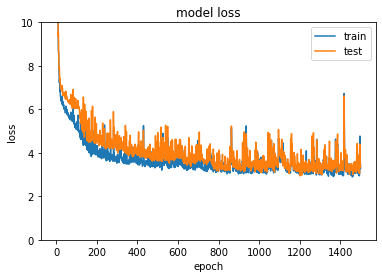

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylim([0, 10])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()